In [1]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Load your dataset
data = pd.read_csv('/Users/surisettivamsikrishna/Downloads/untitled folder/Projects /Briit AW /customer_booking.csv')
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
del data['booking_origin']
del data['trip_type']
del data['route']
del data['sales_channel']

In [4]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu":4,
    "Fri":5,
    "Sat": 6,
    "Sun":7,
}
data['flight_day']=data['flight_day'].map(mapping)

In [5]:
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0


In [6]:
# Define features and target
X = data[['purchase_lead', 'length_of_stay', 'flight_duration']]
y = data['booking_complete']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=1)

In [10]:
# Train the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [11]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [15]:
V=data['flight_day'].value_counts()
V

flight_day
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt

<Axes: xlabel='flight_day'>

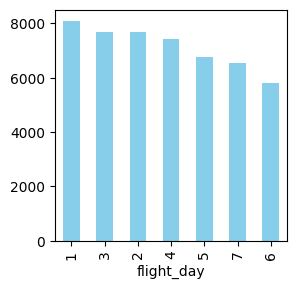

In [19]:
plt.figure(figsize=(3,3))
V.plot(kind='bar', color='skyblue')